In [1]:
import sys
import os
import shutil
import pandas as pd
from PIL import Image

In [48]:
images_path = 'train_1'
image_extensions = ['.jpg', '.png', '.jpeg']
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path)
         for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

In [49]:
newimages = []
for image in images:
    if image.split('/')[-1][0] != '.':
        newimages.append(image)
print(len(newimages))

11025


In [53]:
newimagenames = []
for image in newimages:
    newimagenames.append(image.split('/')[-1])
print(newimagenames[0])

13627.jpg


In [66]:
df = pd.read_csv('train_info.csv')
df = df.loc[df['filename'].isin(newimagenames)]
df = df.groupby(['style']).apply(lambda x: x.sample(n = 425) if len(x) > 425 else None).reset_index(drop=True)

In [68]:
folder = 'PaintingsDataset'
for i,row in enumerate(df.itertuples()):
    if i % 100 == 0:
        print(i)
        
    if i % 10 == 0:
        outpath = os.path.join(folder,'valid')
    else:
        outpath = os.path.join(folder,'train')
        
    style = row.style
    outpath = os.path.join(outpath,style)

    if not os.path.exists(outpath):
        os.makedirs(outpath)

    shutil.copy(os.path.join(images_path,row.filename),os.path.join(outpath,row.filename))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300


22050

In [70]:
df.groupby(['style']).count()['title']

style
Art Nouveau (Modern)    425
Baroque                 425
Expressionism           425
Impressionism           425
Post-Impressionism      425
Realism                 425
Romanticism             425
Surrealism              425
Name: title, dtype: int64

In [2]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Classification: Baroque')

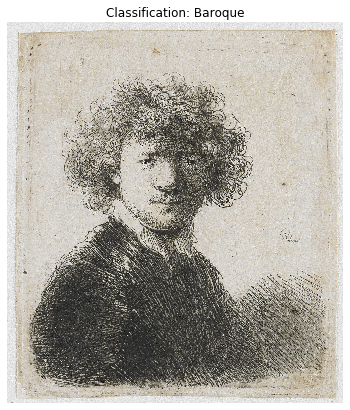

In [10]:
fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.imshow(Image.open('PaintingsDataset/valid/Baroque/10196.jpg'))
axs.axis('off')
axs.set_title('Classification: Baroque')

Text(0.5, 1.0, 'Classification: Impressionism')

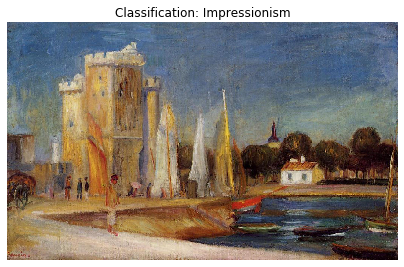

In [12]:
fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.imshow(Image.open('PaintingsDataset/valid/Impressionism/101801.jpg'))
axs.axis('off')
axs.set_title('Classification: Impressionism')